In [17]:
def my_plot_style():
    params = {'legend.fontsize': 10,
    'axes.labelsize': 15,
    'axes.titlesize':15,
    'xtick.labelsize':15,
    'ytick.labelsize':15,
    'xtick.major.size':5,
    'xtick.minor.size':2.5,
    'ytick.major.size':5,
    'ytick.minor.size':2.5,
    'figure.facecolor':'w',
    #'lines.linewidth' : 1.5,
    'xtick.major.width':1.5,
    'ytick.major.width':1.5,
    'xtick.minor.width':1.5,
    'ytick.minor.width':1.5,
    'axes.linewidth':1.5,
    'xtick.direction':'in',
    'ytick.direction':'in',
    'ytick.labelleft':True,
    'text.usetex' : False,
    'font.family': 'sans-serif'}
    plt.rcParams.update(params)
my_plot_style()

In [31]:
import astropy.io.fits as pf
import numpy as np
import matplotlib.pyplot as plt
import csv
from tqdm import tqdm

In [23]:
table_file = 'D://GoogleLimin/110-2/Galaxy/hw02/optical_search_330183.csv'

plate_arr = []
mjd_arr   = []
fiber_arr = []

with open(table_file, newline='') as csvfile:
    rows = csv.DictReader(csvfile)
    for row in rows:
        plate_arr.append(row['#plate'])
        mjd_arr.append(row['mjd'])
        fiber_arr.append(row['fiberid'])

In [78]:
print(len(target_arr))

276


In [38]:
target_arr = []
for i in tqdm(range(len(plate_arr))):
    filename = f'D://GoogleLimin/110-2/Galaxy/hw02/lite/{plate_arr[i]}/spec-{plate_arr[i]}-{mjd_arr[i]}-{int(fiber_arr[i]):04d}.fits'
    f = pf.open(filename)
    if( f[2].data['CLASS   ']=='QSO' and f[2].data['OBJTYPE']=='QSO'):
        target_arr.append(i)
        if(f[2].data['PRIMTARGET' ][0]!=0 and f[2].data['SECTARGET' ]!=0 ):
            print(f[2].data['PRIMTARGET' ],f[2].data['SECTARGET' ])
    f.close()

100%|██████████████████████████████████████████████████████████████████████████████| 1538/1538 [02:49<00:00,  9.07it/s]


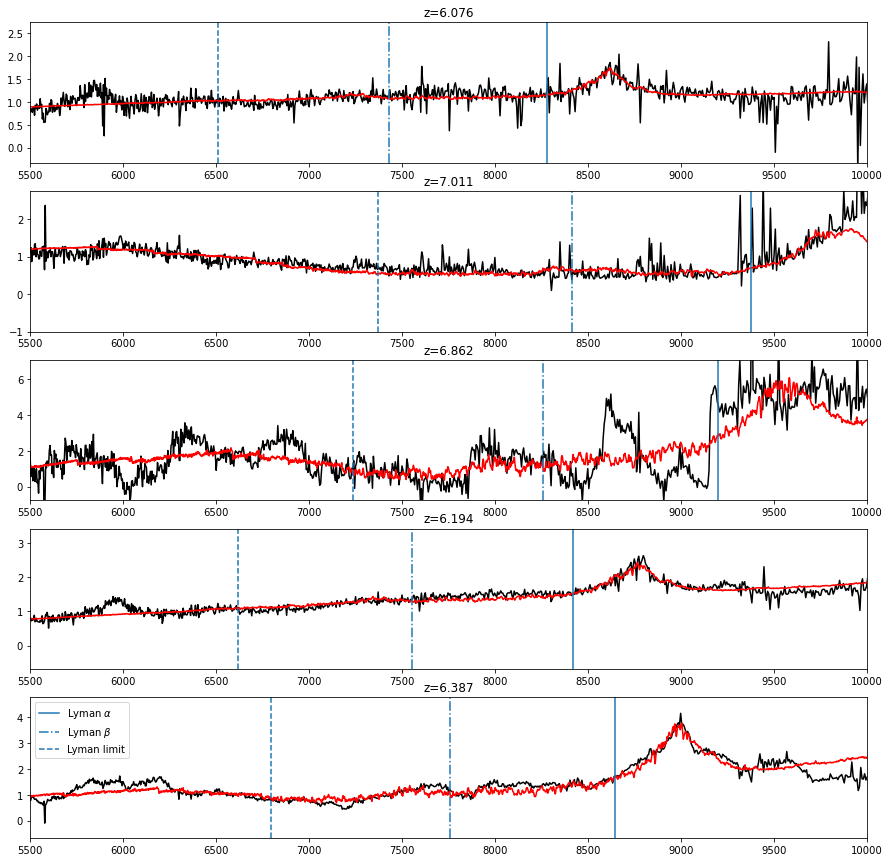

In [80]:
n = 5
st = 90
plt.figure(figsize=[15,3*n])
for c,i in enumerate(target_arr[st:st+n]):
    spectra_file = f'D://GoogleLimin/110-2/Galaxy/hw02/lite/{plate_arr[i]}/spec-{plate_arr[i]}-{mjd_arr[i]}-{int(fiber_arr[i]):04d}.fits'
    f = pf.open(spectra_file)
    flux = f[1].data['FLUX    ']
    lam  = f[1].data['LOGLAM  ']
    mod  = f[1].data['MODEL   ']
    sky  = f[1].data['SKY     ']
    z    = f[2].data['Z       ']
    pixel = len(lam)
    flux = flux
    sm    = 3
    sm_lam  = np.zeros(int(pixel/sm))
    sm_flux = np.zeros(int(pixel/sm))
    for p in range(int(pixel/sm)):
        sm_lam[p]  = np.average(10**lam[sm*p:sm*(p+1)])
        sm_flux[p] = np.median(flux[sm*p:sm*(p+1)])
    plt.subplot(n,1,c+1)
    plt.plot(sm_lam,sm_flux/np.median(sm_flux),c='black')
    plt.plot(10**lam,mod/np.median(sm_flux),c='red')
    #plt.ylim(min(sm_flux/np.median(sm_flux)),max(sm_flux/np.median(sm_flux)))
    plt.ylim([min(mod/np.median(sm_flux))-1,max(mod/np.median(sm_flux))+1])
    plt.xlim([5500,1e4])
    plt.axvline(1170*(1+z),label=r'Lyman $\alpha$')
    plt.axvline(1050*(1+z),ls='-.',label=r'Lyman $\beta$')
    plt.axvline(920*(1+z),ls='--',label=r'Lyman limit')
    #plt.text(7000,max(mod),f'z={z[0]:.3f}')
    plt.title(f'z={z[0]:.3f}')
plt.legend()
plt.savefig('D://GoogleLimin/110-2/Galaxy/hw02/QSO2.png')

## Problem 5 Coma Cluster

RA, Dec  =	194.953054, 27.980694 
Redshift = 0.02316 +/- 0.00017

In [24]:
import astropy.io.fits as pf
import numpy as np
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology

In [20]:
name = 'D://GoogleLimin/110-2/Galaxy/hw02/Skyserver_SQL4_9_2022 11_35_46 AM.fits'
hdul = pf.open(name)
#hdul.info()
hdul[1].header
#hdul.close()

XTENSION= 'BINTABLE'                                                            
BITPIX  =                    8                                                  
NAXIS   =                    2                                                  
NAXIS1  =                   48                                                  
NAXIS2  =                  496                                                  
PCOUNT  =                    0                                                  
GCOUNT  =                    1                                                  
TFIELDS =                    9                                                  
TFORM1  = '1K'                                                                  
TTYPE1  = 'ObjID'                                                               
TFORM2  = '1D'                                                                  
TTYPE2  = 'ra'                                                                  
TTYPE3  = 'dec'             

## Homework 3

### Problem 1

In [4]:
import numpy as np
from scipy.special import gammainc
from scipy.special import gamma
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology

[1.41253754]
[0.89125094]
[0.44668359]


Text(0, 0.5, '$L_{tot}(L)$')

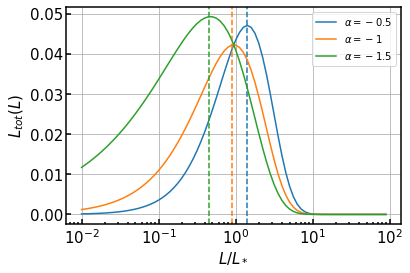

In [32]:
alpha_arr = [-0.5,-1,-1.5]
cs = ['tab:blue','tab:orange','tab:green']
for j,alpha in enumerate(alpha_arr):
    LL = 10**np.arange(-2,2,0.05)
    LtotL = gamma(alpha+2)*(1-gammainc(alpha+2,LL))
    for i in range(len(LL)-1):
        LtotL[i] = LtotL[i]-LtotL[i+1]
    plt.semilogx(LL,LtotL,label=rf'$\alpha={alpha}$',c=cs[j])
    plt.axvline(LL[np.where(LtotL==np.max(LtotL))],ls='--',c=cs[j])
    print(LL[np.where(LtotL==np.max(LtotL))])
plt.grid()
plt.legend()
plt.xlabel(r'$L$/$L_*$')
plt.ylabel(r'$L_{tot}(L)$')

### Problem 2

In [1]:
import astropy.io.fits as pf
import numpy as np
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology
from scipy.stats import linregress
from scipy.stats import t
from scipy.optimize import curve_fit
from scipy.special import gammaincc
from scipy.special import gamma

In [2]:
name = 'D://GoogleLimin/110-2/Galaxy/hw02/Skyserver_SQL4_9_2022 11_35_46 AM.fits'
hdul = pf.open(name)
redshift = hdul[1].data['z']
u = hdul[1].data['dered_u']
g = hdul[1].data['dered_g']
r = hdul[1].data['dered_r']
i = hdul[1].data['dered_i']
z = hdul[1].data['dered_z']

cosmo = cosmology.setCosmology('planck18')
dL = cosmo.luminosityDistance(redshift)/(cosmo.H0/100)

Text(0, 0.5, '$m_g-m_r$')

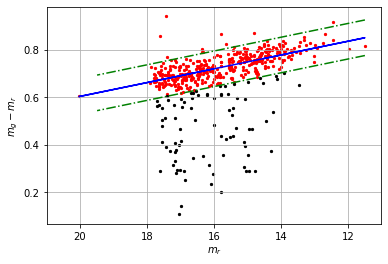

In [3]:
result  = []
thres_arr  = []
for i in range(18):
    thres = 0.05*(i+1)
    boolean = (g-r)>thres
    x_data = r[boolean]
    y_data = (g-r)[boolean]
    if( np.sum(boolean)>2 ):
        linear = linregress(x_data,y_data)
        result.append(linear)
        thres_arr.append(thres)
    
r_value = [abs(l.rvalue) for l in result]
idmax   = np.where(r_value==max(r_value))[0][0]
thres   = thres_arr[idmax]
boolean = (g-r)>thres
x_data = r[boolean]
y_data = (g-r)[boolean]

func = lambda x,a,b:a*x+b
popt, pcov = curve_fit(func, x_data, y_data)
perr       = np.sqrt(np.diag(pcov))

boolean = (g-r)>func(r,popt[0],popt[1]-3*perr[1])

plt.scatter(r[boolean],(g-r)[boolean],c='red',s=5)
plt.scatter(r[~boolean],(g-r)[~boolean],c='black',s=5)
x = np.arange(min(x_data),max(x_data),1)
plt.plot(x_data,func(x_data,*popt),c='blue')
plt.plot(x,func(x,popt[0],popt[1]-3*perr[1]),'-.',c='green')
plt.plot(x,func(x,popt[0],popt[1]+3*perr[1]),'-.',c='green')
plt.xlim([21,11])
plt.grid()
plt.xlabel('$m_r$')
plt.ylabel('$m_g-m_r$')

In [69]:
Mr = r-5*np.log10(dL)-25
Mr[boolean] += 0.19
Mr[~boolean] += -0.16

Text(0, 0.5, 'Number')

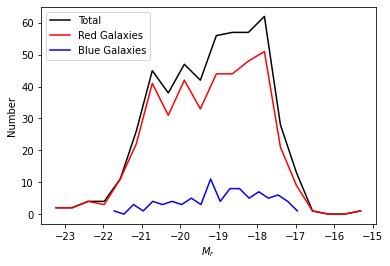

In [70]:
bins = 20
def get_histo(data,bins):
    hist, bedges = np.histogram(data,bins=bins)
    bedge = (bedges[1:]+bedges[:-1])/2
    return hist,bedge
hist,bedge = get_histo(Mr,bins)
plt.plot(bedge,hist,c='black',label='Total')
hist,bedge = get_histo(Mr[boolean],bins)
plt.plot(bedge,hist,c='red',label='Red Galaxies')
hist,bedge = get_histo(Mr[~boolean],bins)
plt.plot(bedge,hist,c='blue',label='Blue Galaxies')

plt.legend()
plt.xlabel('$M_r$')
plt.ylabel('Number')

In [94]:
dL = cosmo.luminosityDistance(redshift)
Mr = r-5*np.log10(dL)-25
Mr[boolean] += 0.19
Mr[~boolean] += -0.16

In [7]:
print(max(Mr))

-14.918643232398232


(1, 500)

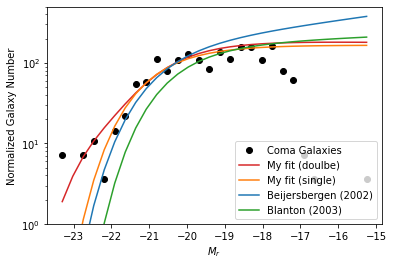

In [71]:
bins = 30
def get_histo(data,bins):
    hist, bedges = np.histogram(data,bins=bins)
    bedge = (bedges[1:]+bedges[:-1])/2
    return hist,bedge
hist, bedge = get_histo(Mr,bins)
plt.semilogy(bedge,hist/(bedge[1]-bedge[0]),'o',c='black',label='Coma Galaxies')

alpha = -1
Ms    = -20.5
phis  = 170
LL = 10**(0.4*(Ms-bedge))
Ntot1 = 0.4*np.log(10)*phis*LL**(alpha+1)*np.exp(-LL)
#plt.semilogy(bedge,Ntot1,'--',c='tab:red')

alpha = -0.9
Ms    = -22
phis  = 50
LL = 10**(0.4*(Ms-bedge))
Ntot2 = 0.4*np.log(10)*phis*LL**(alpha+1)*np.exp(-LL)
#plt.semilogy(bedge,Ntot2,'--',c='tab:red')
plt.semilogy(bedge,Ntot1+Ntot2,label='My fit (doulbe)',c='tab:red')

alpha = -1.0
Ms    = -21
phis  = 180
LL = 10**(0.4*(Ms-bedge))
Ntot = 0.4*np.log(10)*phis*LL**(alpha+1)*np.exp(-LL)
plt.semilogy(bedge,Ntot,label='My fit (single)',c='tab:orange')

alpha = -1.16
Ms    = -20.87
LL = 10**(0.4*(Ms-bedge))
Ntot = 0.4*np.log(10)*phis*LL**(alpha+1)*np.exp(-LL)
plt.semilogy(bedge,Ntot,label='Beijersbergen (2002)',c='tab:blue')

alpha = -1.05
Ms    = -20.44
LL = 10**(0.4*(Ms-bedge))
Ntot = 0.4*np.log(10)*phis*LL**(alpha+1)*np.exp(-LL)
plt.semilogy(bedge,Ntot,label='Blanton (2003)',c='tab:green')

plt.legend(loc='lower right')
plt.xlabel('$M_r$')
plt.ylabel('Normalized Galaxy Number')
plt.ylim([1,500])

226.766715629459
226.766715629459
1.126e+13
97.68210313622802


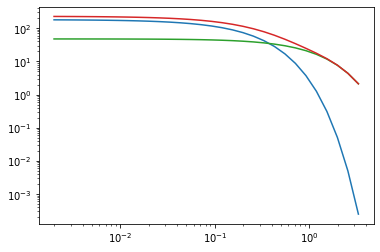

In [72]:
alpha = -1.1
Ms    = -20.5
Ls    = 10**(-Ms/2.5)
phis  = 170
LL = 10**(0.4*(Ms-bedge))
Ltot1 = phis*gamma(alpha+2)*gammaincc(alpha+2,LL)

alpha = -0.9
Ms    = -22
Ls    = 10**(-Ms/2.5)
phis  = 50
LL = 10**(0.4*(Ms-bedge))
Ltot2 = phis*gamma(alpha+2)*gammaincc(alpha+2,LL)

plt.loglog(LL,Ltot1,label='My fit',c='tab:blue')
plt.loglog(LL,Ltot2,label='My fit',c='tab:green')

Ltot = Ltot1+Ltot2
plt.loglog(LL,Ltot,label='My fit',c='tab:red')
print(np.interp(0.1,LL,Ltot))
print(np.interp(0.01,LL,Ltot))
light = np.interp(0.01,LL,Ltot)
print('{:.3e}'.format(light*Ls*3.0128e2/3.828))
print(1.1e15/(light*Ls*3.0128e2/3.828))

73.95252364724321
73.95252364724321
9.225e+11
1192.453115529388


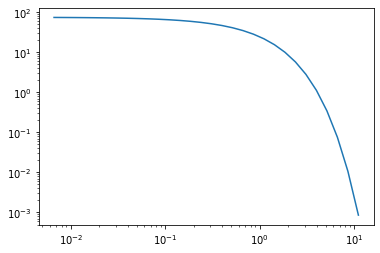

In [67]:
alpha = -1.1
Ms    = -20.5
Ls    = 10**(-Ms/2.5)
phis  = 70
LL = 10**(0.4*(Ms-bedge))
Ntot = phis*LL**alpha*(np.exp(-LL))
Ltot = phis*gamma(alpha+2)*gammaincc(alpha+2,LL)
plt.loglog(LL,Ltot,label='My fit',c='tab:blue')
print(np.interp(0.1,LL,Ltot))
print(np.interp(0.01,LL,Ltot))
light = np.interp(0.01,LL,Ltot)
print('{:.3e}'.format(light*Ls*3.0128e2/3.828))
print(1.1e15/(light*Ls*3.0128e2/3.828))

### Problem 3

In [70]:
import astropy.io.fits as pf
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from colossus.cosmology import cosmology

In [46]:
name = 'D://GoogleLimin/110-2/Galaxy/hw03/mpavagc_simp.fits'
hdul = pf.open(name)
hdul[1].header
yt_ra    = hdul[1].data['RA']
yt_dec   = hdul[1].data['DEC']
yt_z     = hdul[1].data['Z']
yt_d4000 = hdul[1].data['D4000_N_SUB']
hdul.close()

name = 'D://GoogleLimin/110-2/Galaxy/hw03/nsa_v0_1_2.fits'
hdul = pf.open(name)
ra    = hdul[1].data['RA']
dec   = hdul[1].data['DEC']
z     = hdul[1].data['Z']
mag  = hdul[1].data['ABSMAG']
hdul.close()

In [72]:
c1 = SkyCoord(yt_ra,yt_dec,unit='deg')
c2 = SkyCoord(ra,dec,unit='deg')
idx,d2d,d3d = c1.match_to_catalog_sky(c2)

In [60]:
radius = 1/3600
bool1 = d2d<radius*u.deg
bool2 = abs(yt_z-z[idx])<0.001
print(np.sum(bool1&bool2))
print(np.sum(bool1),np.sum(bool2))
boolean = bool1&bool2

sam_z     = z[idx[boolean]]
sam_rmag  = mag[idx[boolean],4]
sam_ra    = ra[idx[boolean]]
sam_dec   = dec[idx[boolean]]
sam_d4000 = yt_d4000[boolean]

110946
111349 121721


In [61]:
# Discard z<0.02
bool1   = sam_z>=0.02
bool2   = sam_rmag<=-20
boolean = bool1&bool2

sam_z     = sam_z[boolean]
sam_rmag  = sam_rmag[boolean]
sam_ra    = sam_ra[boolean]
sam_dec   = sam_dec[boolean]
sam_d4000 = sam_d4000[boolean] 

In [94]:
ra_l  , ra_r  = 100, 270
dec_d , dec_u = -11, 70
sec = (ra_l<sam_ra)&(sam_ra<ra_r)&(dec_d<sam_dec)&(sam_dec<dec_u)
pri = (ra_l+5<sam_ra)&(sam_ra<ra_r-5)&(dec_d+5<sam_dec)&(sam_dec<dec_u-5)
print(np.sum(pri),np.sum(sec))
primary = SkyCoord(sam_ra[pri],sam_dec[pri],unit='deg')
second  = SkyCoord(sam_ra[sec],sam_dec[sec],unit='deg')
pri_z = sam_z[pri]
sec_z = sam_z[sec]
pri_d4000 = sam_d4000[pri]

22938 23104


In [83]:
cosmo = cosmology.setCosmology('planck18')
dL = cosmo.luminosityDistance(sam_z)/(cosmo.H0/100)
pri_dL = dL[pri]

In [92]:
nei = np.zeros([np.sum(pri),3])
for i in range(np.sum(pri)):
    sep = primary[i].separation(second).degree*np.pi/180*pri_dL[0] # Mpc
    dv  = abs(pri_z[i]-sec_z)*3e5
    for j in range(3):
        legal = (sep<1+j*2)&(dv<250)
        nei[i,j] = np.sum(legal)

C:\Users\sandy\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\sandy\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\sandy\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\sandy\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\sandy\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


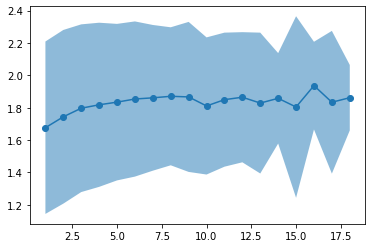

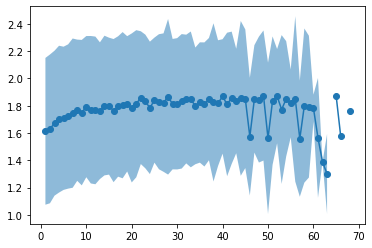

In [145]:
n = len(nei)//150

nei1 = nei[:,0]
d4000 = []
nn = np.arange(1,int(max(nei1))+1)
for i in range(int(max(nei1))):
    samp = nei1==(i+1)
    d4000.append([np.median(pri_d4000[samp]),np.std(pri_d4000[samp])])
d4000 = np.array(d4000)
plt.plot(nn,d4000[:,0],'-o')
plt.fill_between(nn,d4000[:,0]+2*d4000[:,1],d4000[:,0]-2*d4000[:,1],alpha=0.5)
#plt.xlim([0,18])

plt.figure()
nei1 = nei[:,2]
d4000 = []
nn = np.arange(1,int(max(nei1))+1)
for i in range(int(max(nei1))):
    samp = nei1==(i+1)
    d4000.append([np.median(pri_d4000[samp]),np.std(pri_d4000[samp])])
d4000 = np.array(d4000)
plt.plot(nn,d4000[:,0],'-o')
plt.fill_between(nn,d4000[:,0]+2*d4000[:,1],d4000[:,0]-2*d4000[:,1],alpha=0.5)

C:\Users\sandy\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\sandy\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\sandy\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\sandy\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\sandy\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


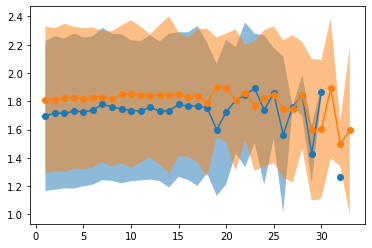

In [143]:
select = nei[:,0]<=2
nei1 = nei[select,1]-nei[select,0]
d4000 = []
nn = np.arange(1,int(max(nei1))+1)
for i in range(int(max(nei1))):
    samp = nei1==(i+1)
    d4000.append([np.median(pri_d4000[select][samp]),np.std(pri_d4000[select][samp])])
d4000 = np.array(d4000)
plt.plot(nn,d4000[:,0],'-o')
plt.fill_between(nn,d4000[:,0]+2*d4000[:,1],d4000[:,0]-2*d4000[:,1],alpha=0.5)


select = nei[:,0]>2
nei1 = nei[select,1]-nei[select,0]
d4000 = []
nn = np.arange(1,int(max(nei1))+1)
for i in range(int(max(nei1))):
    samp = nei1==(i+1)
    d4000.append([np.median(pri_d4000[select][samp]),np.std(pri_d4000[select][samp])])
d4000 = np.array(d4000)
plt.plot(nn,d4000[:,0],'-o')
plt.fill_between(nn,d4000[:,0]+2*d4000[:,1],d4000[:,0]-2*d4000[:,1],alpha=0.5)